In [134]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [135]:
data=pd.read_csv("train.csv")

In [136]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [140]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
#Fill null values in Cabin column to allow manipulation
data['Cabin'] = data['Cabin'].fillna('empty')
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [142]:
#Combines parents/children and siblings/spouses columns to create a feature for total family members on board 
data['FamilyCount'] = data['SibSp'] + data['Parch']

#Title feature: the lambda function splits the Name string at the comma
#and again at the period following, to isolate passenger title.
data['Title'] = data['Name'].map(lambda x: x.split(', ')[1].split('.')[0])
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [143]:
#Overall survival rate
data['Survived'].mean()

0.3838383838383838

In [144]:
#Survival rate by sex
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [145]:
#Survival rate by passenger class (1 is most expensive)
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [146]:
#Survival rate by port of embarkation (potentially confounded with passenger class)
data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [147]:
#Survival rate for passengers with no cabin listing
print('Without cabin listing: ', data[data['Cabin']=='empty']['Survived'].mean())

#Survival rate for passengers WITH cabin listing
print('With cabin listing: ', data[data['Cabin']!='empty']['Survived'].mean())

#Survival rate for passengers with no age information
print('Without age data: ', data[data['Age'].isnull()==True]['Survived'].mean())

#Survival rate for passengers with age information
print('With age data: ', data[data['Age'].notnull()==True]['Survived'].mean())

Without cabin listing:  0.29985443959243085
With cabin listing:  0.6666666666666666
Without age data:  nan
With age data:  0.3838383838383838


In [148]:
#Survival breakdown by title with counts
titles = pd.DataFrame(data.groupby('Title')['Survived'].sum())
titles['Total Count'] = data.groupby('Title')['Survived'].count()
titles['Survival Rate'] = data.groupby('Title')['Survived'].mean()
titles.rename(columns = {'Survived':'Survival Count'}, inplace=True)
titles

,Survival Count,Total Count,Survival Rate
Title,,,
Capt,0,1,0.000000
Col,1,2,0.500000
Don,0,1,0.000000
Dr,3,7,0.428571
Jonkheer,0,1,0.000000
Lady,1,1,1.000000
Major,1,2,0.500000
Master,23,40,0.575000
Miss,127,182,0.697802


Survival Rate By Passenger Class

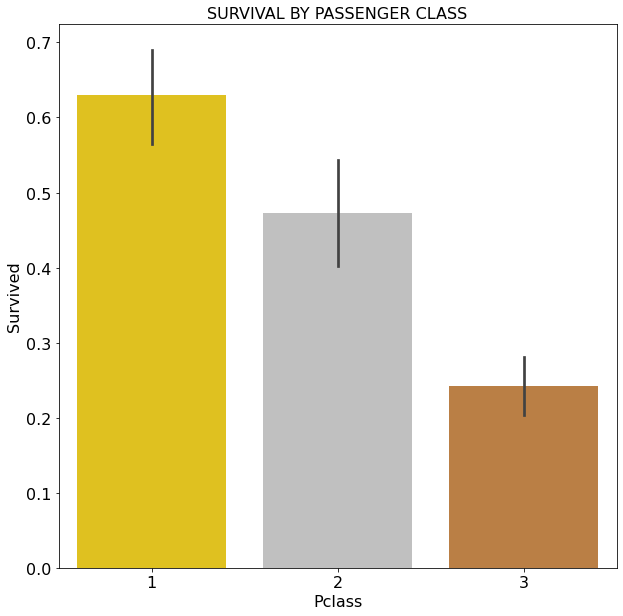

In [174]:
# Function to convert values to native Python types
def convert_to_python_types(value):
    if pd.api.types.is_integer_dtype(value):
        return int(value)
    elif pd.api.types.is_float_dtype(value):
        return float(value)
    elif pd.api.types.is_bool_dtype(value):
        return bool(value)
    else:
        return str(value)

# Function to extract plot data
def extract_plot_data(x_column, y_column, data):
    unique_x_values = data[x_column].unique()
    plot_data = [{'x': convert_to_python_types(x), 'y': convert_to_python_types(data[data[x_column] == x][y_column].mean())} for x in unique_x_values]
    return plot_data

# Set the font size for labels
font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
sns.barplot(x="Pclass", y="Survived", palette=["#FFD700","#C0C0C0","#CD7F32"], data=data)
plt.title("Survival Rate by Passenger Class")

plt.title('SURVIVAL BY PASSENGER CLASS', fontsize=16)  # You can adjust the title font size as needed

# Set the font size for labels
plt.rcParams['font.size'] = font_size

plt.savefig('survival_by_passenger_class.svg', format='svg', bbox_inches='tight', dpi=24000)
plt.show()

Survival By Gender

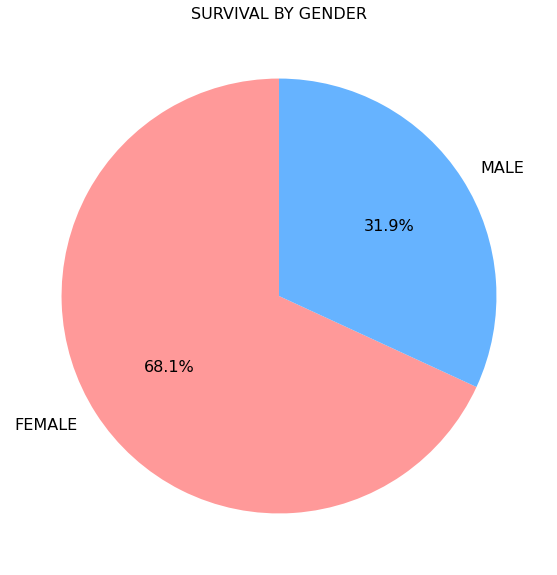

In [190]:
def convert_to_python_types(value):
    if pd.api.types.is_integer_dtype(value):
        return int(value)
    elif pd.api.types.is_float_dtype(value):
        return float(value)
    elif pd.api.types.is_bool_dtype(value):
        return bool(value)
    else:
        return str(value)

# Function to extract pie chart data
def extract_pie_chart_data(column, data):
    pie_data = data.groupby(column)['Survived'].sum()
    pie_data = [{'label': convert_to_python_types(index), 'value': convert_to_python_types(value)} for index, value in pie_data.items()]
    return pie_data

# Convert labels to uppercase
labels = [label.upper() for label in survival_by_gender.index]

# Set the font size for labels
font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
plt.pie(survival_by_gender, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('SURVIVAL BY GENDER', fontsize=16)  # You can adjust the title font size as needed

# Set the font size for labels
plt.rcParams['font.size'] = font_size

plt.savefig('survival_by_gender_pie_chart.svg', format='svg', bbox_inches='tight', dpi=24000)

#plt.savefig('survival_by_gender_pie_chart.jpg', format='jpg', bbox_inches='tight')
# Extract the pie chart data
pie_chart_data = extract_pie_chart_data('Sex',data)
plt.show()



Age Distribution and Survival

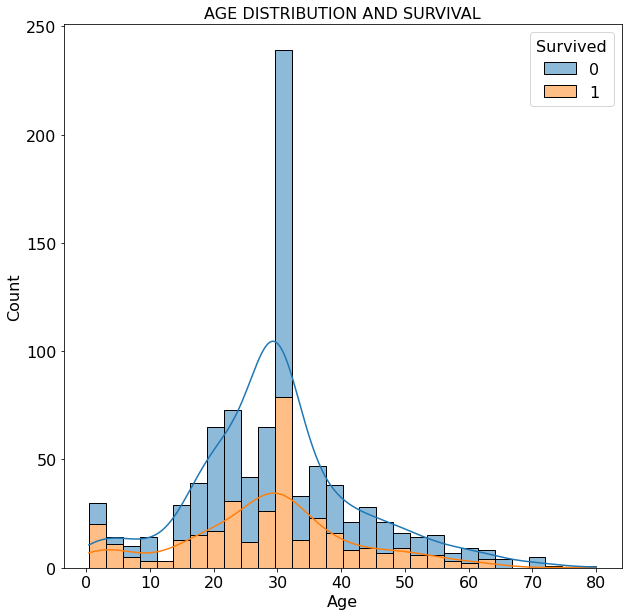

In [191]:
# 3. Age Distribution and Survival
font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack", bins=30, kde=True)
plt.title("AGE DISTRIBUTION AND SURVIVAL", fontsize=16)
# Set the font size for labels
plt.rcParams['font.size'] = font_size

#plt.savefig('survival_by_age_hitoplot.svg', format='svg', bbox_inches='tight', dpi=24000)

plt.savefig('survival_by_age_hitoplot.jpg', format='jpg', bbox_inches='tight')
plt.show()

Family Size and Survival

C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


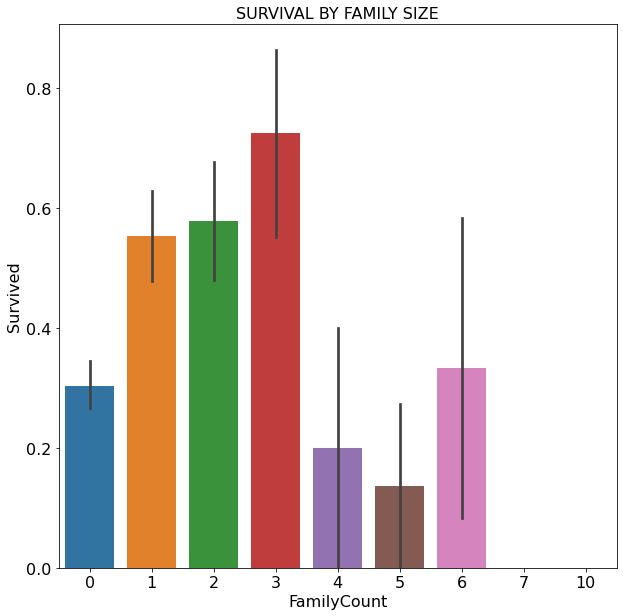

In [192]:
# Function to convert values to native Python types
def convert_to_python_types(value):
    if pd.api.types.is_integer_dtype(value):
        return int(value)
    elif pd.api.types.is_float_dtype(value):
        return float(value)
    elif pd.api.types.is_bool_dtype(value):
        return bool(value)
    else:
        return str(value)

# Function to extract plot data
def extract_plot_data(x_column, y_column, data):
    unique_x_values = data[x_column].unique()
    plot_data = [{'x': convert_to_python_types(x), 'y': convert_to_python_types(data[data[x_column] == x][y_column].mean())} for x in unique_x_values]
    return plot_data

font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
sns.barplot(x="FamilyCount", y="Survived", data=data)
plt.title("SURVIVAL BY FAMILY SIZE", Fontsize=16)

plt.rcParams['font.size'] = font_size

#plt.savefig('survival_by_family_size.svg', format='svg', bbox_inches='tight', dpi=24000)

plt.savefig('survival_by_family_size.jpg', format='jpg', bbox_inches='tight')

plt.show()

Fare and Cabin Analysis

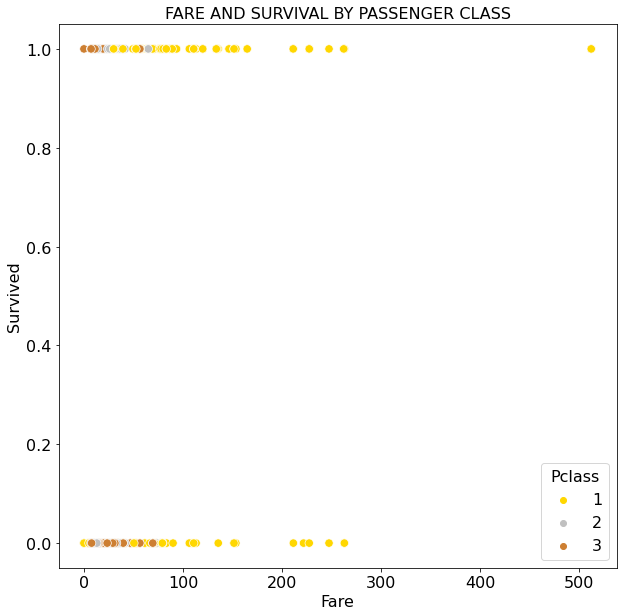

In [189]:
# Function to convert values to native Python types
def convert_to_python_types(value):
    if pd.api.types.is_integer_dtype(value):
        return int(value)
    elif pd.api.types.is_float_dtype(value):
        return float(value)
    elif pd.api.types.is_bool_dtype(value):
        return bool(value)
    else:
        return str(value)

# Function to extract plot data for scatter plot
def extract_scatter_plot_data(x_column, y_column, hue_column, data):
    scatter_data = data[[x_column, y_column, hue_column]].copy()
    scatter_data[hue_column] = scatter_data[hue_column].astype(str)
    scatter_data = scatter_data.groupby([x_column, hue_column])[y_column].mean().reset_index()
    scatter_data = [{'x': convert_to_python_types(row[x_column]),
                     'y': convert_to_python_types(row[y_column]),
                     'hue': convert_to_python_types(row[hue_column])} for index, row in scatter_data.iterrows()]
    return scatter_data

font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
# 5. Fare and Cabin Analysis
sns.scatterplot(x="Fare", y="Survived", hue="Pclass",palette=["#FFD700","#C0C0C0","#CD7F32"],s=70, data=data)
plt.title("FARE AND SURVIVAL BY PASSENGER CLASS", fontsize=16)

plt.rcParams['font.size'] = font_size

plt.savefig('far_and_cabin_analysis.svg', format='svg', bbox_inches='tight', dpi=24000)

plt.show()



Port of Embarkation

C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


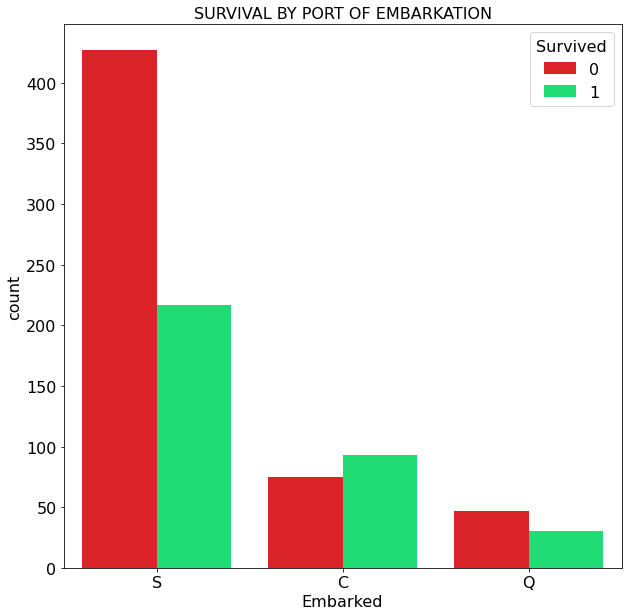

In [194]:
font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
sns.countplot(x="Embarked", hue="Survived",palette=["#fa050d","#02fa72"],data=data)
plt.title("SURVIVAL BY PORT OF EMBARKATION", Fontsize=16)

plt.rcParams['font.size'] = font_size

#plt.savefig('survival_by_embark.svg', format='svg', bbox_inches='tight', dpi=24000)

plt.savefig('survival_by_embark.jpg', format='jpg', bbox_inches='tight')
plt.show()

C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':


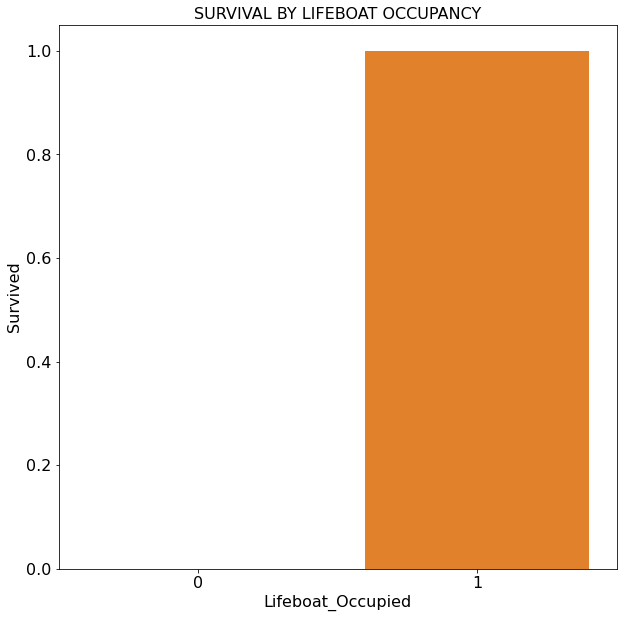

In [183]:
# Lifeboat Occupancy (hypothetical variable)
# Assuming a binary variable "Lifeboat_Occupied" indicating whether a lifeboat was occupied or not
data["Lifeboat_Occupied"] = data["Survived"].apply(lambda x: 1 if x == 1 else 0)
font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
sns.barplot(x="Lifeboat_Occupied", y="Survived", data=data)
plt.title("SURVIVAL BY LIFEBOAT OCCUPANCY", Fontsize=16)

plt.rcParams['font.size'] = font_size

plt.savefig('survival_by_lifeboat.svg', format='svg', bbox_inches='tight', dpi=24000)
plt.show()

C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


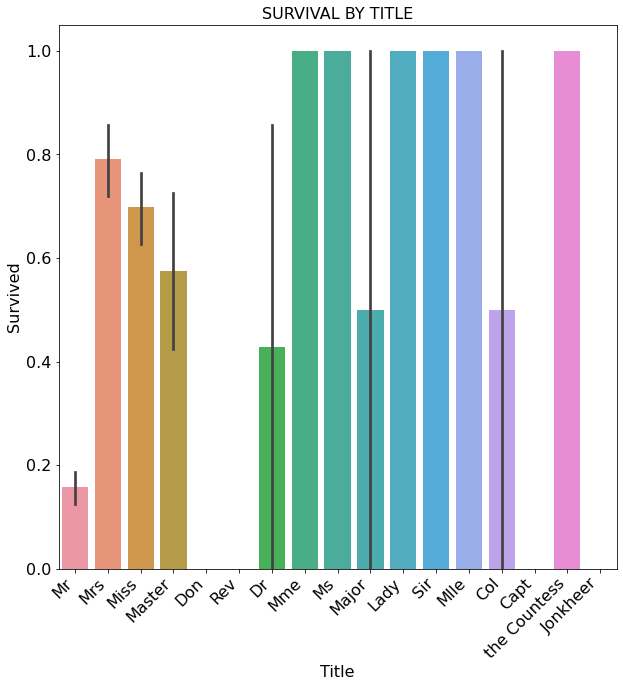

In [195]:
# Name Analysis (hypothetical variable)
# Extracting titles from names
data["Title"] = data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
sns.barplot(x="Title", y="Survived", data=data)

plt.xticks(rotation=45, ha="right")
plt.title("SURVIVAL BY TITLE", Fontsize=16)

plt.rcParams['font.size'] = font_size

#plt.savefig('survival_by_title.svg', format='svg', bbox_inches='tight', dpi=24000)  
plt.savefig('survival_by_title.jpg', format='jpg', bbox_inches='tight')  
plt.show()

C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


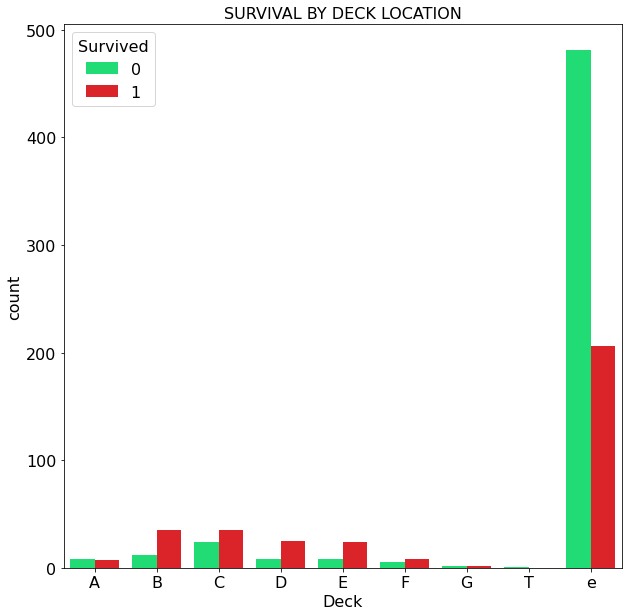

In [185]:
data["Deck"] = data["Cabin"].str[:1]
font_size = 16  # You can adjust the font size as needed

# Create the pie chart with updated labels and font size
plt.figure(figsize=(10,10))
sns.countplot(x="Deck", hue="Survived",palette=["#02fa72","#fa050d"], data=data, order=sorted(data["Deck"].dropna().unique()))
plt.title("SURVIVAL BY DECK LOCATION", Fontsize=16)

plt.rcParams['font.size'] = font_size

plt.savefig('survival_by_deck.svg', format='svg', bbox_inches='tight', dpi=24000)
plt.show()